In [2]:
using NevanlinnaAC
using NevanlinnaAC: loss_fermi, gradient_function
using Optim

using DelimitedFiles, Plots

In [3]:
#load test data
Aw_exact = readdlm("./data/gaussian/A_gaussian_3.txt")
data  = readdlm("./data/gaussian/giwn_gaussian_3.txt")
Nuse = 10
xdata = convert(Vector{ComplexF64}, data[1:Nuse,1])
ydata = data[1:Nuse,2] + 1.0im * data[1:Nuse,3];

In [4]:
ωmax = 4π;  Nω = 500; η=0.05;

In [5]:
w0, A0 = spectral_function(Fermi, xdata, ydata; ωmax, Nω, η);

In [23]:
# \int(A) ~ norm(dA2_dw2) check!!
loss = params -> loss_fermi(params, xdata, ydata; ωmax, Nω, η, λ = 1.e-10)

#17 (generic function with 1 method)

In [27]:
Nh = 10
p0 = zeros(2Nh)
res = Optim.optimize(loss, gradient_function(loss, p0), p0, LBFGS(), Optim.Options(show_trace=true, show_every=5))

 * Status: success

 * Candidate solution
    Final objective value:     2.333806e-09

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 3.60e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 9.39e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.80e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 7.72e-03 ≰ 0.0e+00
    |g(x)|                 = 9.64e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   156  (vs limit Inf)
    Iterations:    24
    f(x) calls:    90
    ∇f(x) calls:   90


In [28]:
w2, A2 = spectral_function(Fermi, xdata, ydata, res.minimizer; ωmax, Nω, η);

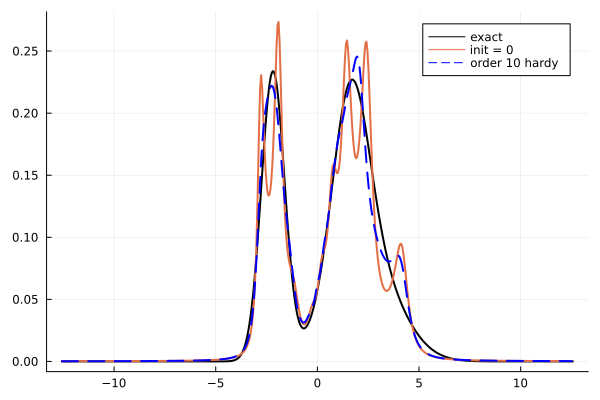

In [29]:
plot(Aw_exact[:,1], Aw_exact[:,2], line=(:black, 2), label="exact")
plot!(w0, A0, line=(2), label="init = 0")
plot!(w2, A2, line=(2, :dash, :blue), label="order $(Nh) hardy")